In [422]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')

In [423]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [424]:
df.isna().sum();

In [425]:
#dropping all nulls in the dataset
df.dropna(inplace=True)

In [426]:
#checking if nulls were dropped from the dataset
df.isna().sum() == 0

id                      True
imdb_id                 True
popularity              True
budget                  True
revenue                 True
original_title          True
cast                    True
homepage                True
director                True
tagline                 True
keywords                True
overview                True
runtime                 True
genres                  True
production_companies    True
release_date            True
vote_count              True
vote_average            True
release_year            True
budget_adj              True
revenue_adj             True
dtype: bool

In [427]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1992 non-null   int64  
 1   imdb_id               1992 non-null   object 
 2   popularity            1992 non-null   float64
 3   budget                1992 non-null   int64  
 4   revenue               1992 non-null   int64  
 5   original_title        1992 non-null   object 
 6   cast                  1992 non-null   object 
 7   homepage              1992 non-null   object 
 8   director              1992 non-null   object 
 9   tagline               1992 non-null   object 
 10  keywords              1992 non-null   object 
 11  overview              1992 non-null   object 
 12  runtime               1992 non-null   int64  
 13  genres                1992 non-null   object 
 14  production_companies  1992 non-null   object 
 15  release_date        

In [428]:
#drops columns that aren't needed for conclusions
drop_columns = ['cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies']

df.drop(drop_columns, axis=1, inplace=True)

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [429]:
#show the average popularity of a movie as we are going to compare budgets vs. popularity
df['popularity'].mean()

1.3167630110441788

In [430]:
#changes dtype to show actual numbers
df['budget_adj'] = df['budget_adj'].astype(int)
df['budget_adj'].describe().astype(int)

count         1992
mean      36273759
std       51297833
min              0
25%              0
50%       15246006
75%       50644500
max      425000000
Name: budget_adj, dtype: int32

In [431]:
bin_edges = [0, 15246006, 50644500, 425000000]

In [432]:
bin_labels = ['Low Budget', 'Moderate Budget', 'Strong Budget']

In [433]:
df['budget_rank'] = pd.cut(df['budget_adj'], bin_edges, labels=bin_labels)

In [434]:
df.groupby(['budget_rank'])['popularity'].mean()

budget_rank
Low Budget         0.817461
Moderate Budget    1.405230
Strong Budget      2.636743
Name: popularity, dtype: float64

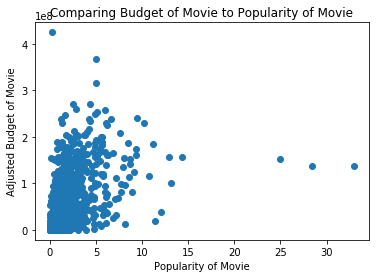

In [435]:
x = df['budget_adj']
y= df['popularity']
plt.scatter(x=y, y=x);

plt.xlabel('Popularity of Movie')
plt.ylabel('Adjusted Budget of Movie')
plt.title('Comparing Budget of Movie to Popularity of Movie');

In [463]:
# Which genres are most popular from year to year?
g = df[df['genres'].str.contains("|")]
g

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_rank
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,137999939,1.392446e+09,Strong Budget
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,137999939,3.481613e+08,Strong Budget
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,101199955,2.716190e+08,Strong Budget
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,183999919,1.902723e+09,Strong Budget
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,174799923,1.385749e+09,Strong Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10724,668,tt0064757,1.778746,7000000,81974493,On Her Majesty's Secret Service,Peter R. Hunt,142,Adventure|Action|Thriller,12/12/1969,258,6.4,1969,41609849,4.872780e+08,Moderate Budget
10759,948,tt0077651,1.198849,300000,70000000,Halloween,John Carpenter,91,Horror|Thriller,10/25/1978,522,7.3,1978,1002810,2.339890e+08,Low Budget
10760,8469,tt0077975,1.157930,2700000,141000000,Animal House,John Landis,109,Comedy,7/27/1978,230,6.7,1978,9025291,4.713208e+08,Low Budget
10817,13963,tt0077838,0.064029,0,321952,The Last Waltz,Martin Scorsese,117,Documentary|Music,5/1/1978,33,8.0,1978,0,1.076189e+06,NaN


In [468]:
#Make Copys of data for cleaning
g1 =g.copy()
g2 =g.copy()
g3 =g.copy()
g4 =g.copy()
g5 =g.copy()

In [469]:
split_columns = ['genres']

for c in split_columns:
    g1[c] = g1[c].apply(lambda x: x.split("|")[0])
    g2[c] = g2[c].apply(lambda x: x.split("|")[1])
    g3[c] = g3[c].apply(lambda x: x.split("|")[2])
    g4[c] = g4[c].apply(lambda x: x.split("|")[3])
    g5[c] = g5[c].apply(lambda x: x.split("|")[4])

IndexError: list index out of range

In [458]:
# count of each genre
genre_count = df['genres'].value_counts()
genre_count

Drama                                       127
Comedy                                      105
Drama|Romance                                52
Documentary                                  51
Horror|Thriller                              50
                                           ... 
History|Drama|Music                           1
Animation|Action|Family|Science Fiction       1
Adventure|Animation|Action|Comedy|Family      1
Thriller|Comedy|Action                        1
Action|Comedy|Thriller|Romance                1
Name: genres, Length: 682, dtype: int64

In [451]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_rank
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,137999939,1.392446e+09,Strong Budget
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,137999939,3.481613e+08,Strong Budget
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,101199955,2.716190e+08,Strong Budget
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,183999919,1.902723e+09,Strong Budget
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,174799923,1.385749e+09,Strong Budget
